In [1]:
%matplotlib inline

# Artificial Neural Networks
Artificial neural networks are not a new concept. They have been around for many years.

## Import Dependencies
We will begin by importing the required packages.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

Using TensorFlow backend.


## Get Our Data

In [3]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


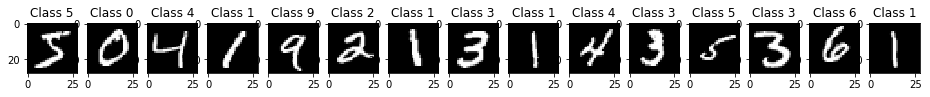

In [4]:
num_figures = 15
plt.figure(figsize=(16,8))
for i in range(num_figures):
    plt.subplot(1,num_figures,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [5]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [6]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [7]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
                           
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
history = model.fit(X_train, Y_train,
          batch_size=128, 
          epochs=10,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.2509 - acc: 0.9242 - val_loss: 0.1041 - val_acc: 0.9669
Epoch 2/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.1028 - acc: 0.9679 - val_loss: 0.0770 - val_acc: 0.9770
Epoch 3/10
60000/60000 [==============================] - 1s 25us/step - loss: 0.0722 - acc: 0.9773 - val_loss: 0.0758 - val_acc: 0.9762
Epoch 4/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.0568 - acc: 0.9823 - val_loss: 0.0792 - val_acc: 0.9754
Epoch 5/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.0447 - acc: 0.9851 - val_loss: 0.0669 - val_acc: 0.9811
Epoch 6/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.0403 - acc: 0.9866 - val_loss: 0.0633 - val_acc: 0.9822
Epoch 7/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.0334 - acc: 0.9894 - val_loss: 0.0676 - val_acc

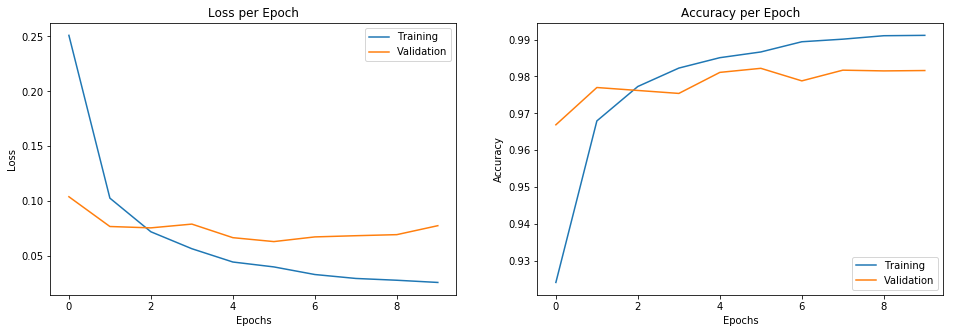

In [10]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.subplot(1,2,2)
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right')

In [11]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 29us/step
Test score: 0.07778577012298701
Test accuracy: 0.9816


In [12]:
predicted_classes = model.predict_classes(X_test)

correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

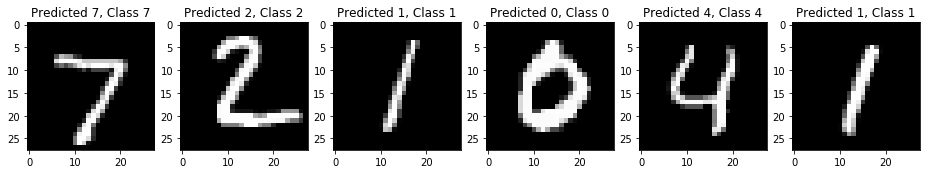

In [13]:
num_figures = 6
plt.figure(figsize=(16,8))
for i, correct in enumerate(correct_indices[:num_figures]):
    plt.subplot(1,num_figures,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))

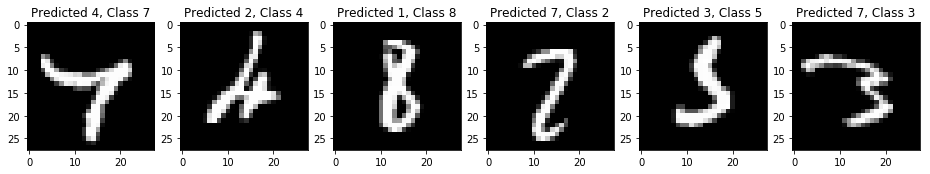

In [14]:
num_figures = 6
plt.figure(figsize=(16,8))
for i, incorrect in enumerate(incorrect_indices[:num_figures]):
    plt.subplot(1,num_figures,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))